## 导入包和数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
X, y = digits.data, digits.target
X.shape
X #是⼀一个稀疏矩阵

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
X = digits.data

In [4]:
y = digits.target

In [5]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=420)

## 训练样本集

**参数**（高斯分布一般不需对参数修改，比较简单）

prior
可输⼊任何类数组结构，形状为（n_classes，）
表示类的先验概率。如果指定，则不根据数据调整先验，如果不指定，则⾃⾏根据数据计算先验概率 。

var_smoothing
浮点数，可不填（默认值= 1e-9）
在估计⽅差时，为了追求估计的稳定性，将所有特征的⽅差中最⼤的⽅差以某个⽐例添加到估计的⽅差中。这个⽐例，由var_smoothing参数控制。

In [6]:
gnb = GaussianNB().fit(Xtrain,ytrain)

acc_score = gnb.score(Xtest,ytest)
acc_score

0.8592592592592593

In [7]:
y_pred = gnb.predict(Xtest)
y_pred

array([6, 1, 3, 0, 4, 5, 0, 8, 3, 8, 6, 8, 7, 8, 8, 8, 5, 9, 5, 6, 5, 4,
       7, 4, 8, 2, 7, 2, 8, 9, 2, 8, 3, 6, 0, 3, 8, 8, 1, 5, 2, 8, 8, 9,
       2, 2, 0, 7, 3, 6, 7, 2, 8, 0, 5, 4, 1, 9, 4, 0, 5, 8, 9, 1, 7, 8,
       7, 5, 8, 2, 4, 4, 8, 2, 6, 1, 2, 1, 7, 8, 8, 5, 9, 4, 3, 6, 9, 7,
       4, 2, 4, 8, 0, 5, 7, 7, 7, 4, 7, 8, 8, 7, 0, 7, 2, 1, 9, 9, 8, 7,
       1, 5, 1, 8, 0, 4, 8, 9, 5, 6, 4, 8, 3, 8, 0, 6, 8, 6, 7, 6, 1, 8,
       5, 0, 8, 2, 1, 8, 8, 6, 6, 0, 2, 4, 7, 8, 9, 5, 9, 4, 7, 8, 8, 6,
       7, 0, 8, 4, 7, 2, 2, 6, 4, 4, 1, 0, 3, 4, 3, 8, 7, 0, 6, 9, 7, 5,
       5, 3, 6, 1, 6, 6, 2, 3, 8, 2, 7, 3, 1, 1, 6, 8, 8, 8, 7, 7, 2, 5,
       0, 0, 8, 6, 6, 7, 6, 0, 7, 5, 5, 8, 4, 6, 5, 1, 5, 1, 9, 6, 8, 8,
       8, 2, 4, 8, 6, 5, 9, 9, 3, 1, 9, 1, 3, 3, 5, 5, 7, 7, 4, 0, 9, 0,
       9, 9, 6, 4, 3, 4, 8, 1, 0, 2, 9, 7, 6, 8, 8, 0, 6, 0, 1, 7, 1, 9,
       5, 4, 6, 8, 1, 5, 7, 7, 5, 1, 0, 0, 9, 3, 9, 1, 6, 3, 7, 2, 7, 1,
       9, 9, 8, 3, 3, 5, 7, 7, 7, 3, 9, 5, 0, 7, 5,

In [9]:
# 预测概率
prob = gnb.predict_proba(Xtest)
prob

array([[0.00000000e+000, 4.69391744e-052, 1.74871280e-098, ...,
        0.00000000e+000, 4.19588993e-033, 1.51751459e-119],
       [0.00000000e+000, 1.00000000e+000, 9.26742456e-013, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 3.73608152e-026, ...,
        0.00000000e+000, 1.29541754e-039, 5.54684869e-077],
       ...,
       [0.00000000e+000, 2.43314963e-047, 4.82483668e-305, ...,
        2.31612692e-008, 1.23891596e-126, 2.87896140e-257],
       [0.00000000e+000, 8.26462929e-129, 4.99150558e-012, ...,
        0.00000000e+000, 4.01802372e-003, 6.19000712e-013],
       [0.00000000e+000, 9.99929965e-001, 1.45462767e-013, ...,
        5.05856094e-005, 1.94498169e-005, 3.42317317e-042]])

In [10]:
prob.shape

(540, 10)

In [11]:
prob[1,:].sum()

1.000000000000003

In [12]:
prob.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## 多分类问题引入的混淆矩阵

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(ytest,y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]], dtype=int64)

## 拟合效果与运算速度对比

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit  #在样本集中按比例选取一部分样本
from time import time
import datetime

In [14]:
def plot_learning_curve(estimator,title, X, y,ax,ylim=None,
                        cv=None, 
                        n_jobs=None):
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, y,cv=cv,
                                                            n_jobs=n_jobs)

    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', 
            color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-',
            color="g",label="Test score")
    ax.legend(loc="best")
    return ax

### GaussianNB 模型

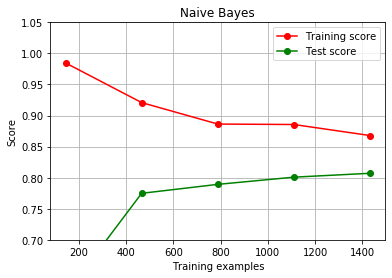

In [15]:
estimator = GaussianNB()
plt.figure()
plot_learning_curve(estimator,'Naive Bayes',X,y,
                   ax = plt.gca(),ylim=[0.7,1.05],
                    n_jobs=4,cv=5)

### 不同模型的对比

In [17]:
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Logistic"]
model = [GaussianNB(),DTC(),SVC(gamma=0.001),RFC(n_estimators=50),LR(C=.1,solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

Naive Bayes:00:01:620766
DecisionTree:00:01:589221
SVM, RBF kernel:00:10:194560
RandomForest:00:13:234118
Logistic:00:33:544610


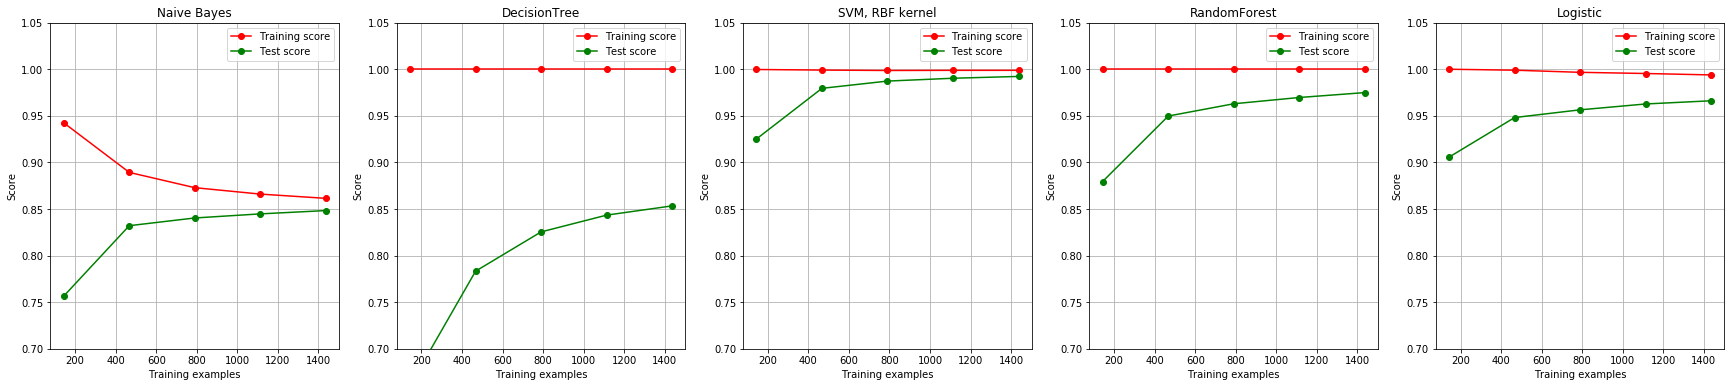

In [18]:
fig, axes = plt.subplots(1,5,figsize=(30,6))
for ind,title_,estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, X, y,
                        ax=axes[ind], ylim = [0.7, 1.05],n_jobs=4, cv=cv)

    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))

plt.show()

### MultinomialNB 模型

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss

In [23]:
class_1 = 500
class_2 = 500 #两个类别分别设定500个样本
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中⼼心
clusters_std = [0.5, 0.5] #设定两个类别的⽅方差
X, y = make_blobs(n_samples=[class_1, class_2],centers=centers,cluster_std=clusters_std,
                  random_state=0, shuffle=False)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [24]:
# 0,1的二项分布
np.unique(Ytrain)

array([0, 1])

In [41]:
#先归⼀化，保证输⼊多项式朴素⻉叶斯的特征矩阵中不带有负数
mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

#### 模型训练

In [42]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [43]:
#重要属性：调⽤根据数据获取的，每个标签类的对数先验概率log(P(Y))
#由于概率永远是在[0,1]之间，因此对数先验概率返回的永远是负值
mnb.class_log_prior_

array([-0.69029411, -0.69600841])

In [44]:
#可以使⽤np.exp来查看真正的先验概率概率值P(Y)
np.exp(mnb.class_log_prior_)

array([0.50142857, 0.49857143])

In [35]:
#重要属性：返回⼀个固定标签类别下的每个特征的对数概率log(P(Xi|Y))
mnb.feature_log_prob_

array([[-0.76164788, -0.62903951],
       [-0.72500918, -0.6622691 ]])

In [36]:
mnb.feature_log_prob_.shape

(2, 2)

In [37]:
#重要属性：在fit时每个标签类别下包含的样本数。当fit接⼝中的sample_weight被设置时，该接⼝返回的值也会受到加权的影响
mnb.class_count_

array([351., 349.])

In [38]:
mnb.class_count_.shape

(2,)

In [45]:
mnb.predict(Xtest_)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
mnb.predict_proba(Xtest_)

array([[0.49847128, 0.50152872],
       [0.50065987, 0.49934013],
       [0.50122363, 0.49877637],
       [0.50183745, 0.49816255],
       [0.50146433, 0.49853567],
       [0.50153147, 0.49846853],
       [0.50204549, 0.49795451],
       [0.50033124, 0.49966876],
       [0.50105254, 0.49894746],
       [0.50182815, 0.49817185],
       [0.50270707, 0.49729293],
       [0.50133396, 0.49866604],
       [0.49820896, 0.50179104],
       [0.50342829, 0.49657171],
       [0.50099022, 0.49900978],
       [0.49974388, 0.50025612],
       [0.50423879, 0.49576121],
       [0.50449207, 0.49550793],
       [0.49818224, 0.50181776],
       [0.50245485, 0.49754515],
       [0.50393627, 0.49606373],
       [0.50193571, 0.49806429],
       [0.49996152, 0.50003848],
       [0.50460038, 0.49539962],
       [0.50261175, 0.49738825],
       [0.50140163, 0.49859837],
       [0.50332522, 0.49667478],
       [0.50122253, 0.49877747],
       [0.50409939, 0.49590061],
       [0.49998717, 0.50001283],
       [0.

In [40]:
mnb.score(Xtest_,Ytest)

0.5433333333333333

#### 哑变量

In [47]:
#来试试看把Xtiain转换成分类型数据吧
#注意我们的Xtrain没有经过归⼀化，因为做哑变量之后⾃然所有的数据就不会⼜负数了
from sklearn.preprocessing import KBinsDiscretizer
kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
Xtrain_ = kbs.transform(Xtrain)
Xtest_ = kbs.transform(Xtest)
mnb = MultinomialNB().fit(Xtrain_, Ytrain)
mnb.score(Xtest_,Ytest)

0.9966666666666667

### BernoulliNB模型

In [48]:
from sklearn.naive_bayes import BernoulliNB

In [49]:
mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [50]:
bnl = BernoulliNB().fit(Xtrain_,Ytrain)
bnl.score(Xtest_,Ytest)

0.49666666666666665

In [51]:
# binarize参数，二值化
bnl_  = BernoulliNB(binarize=0.5).fit(Xtrain_,Ytrain)
bnl_.score(Xtest_,Ytest)

0.9833333333333333

### 样本不均衡问题

In [57]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS,recall_score,roc_auc_score as AUC

#### 导⼊需要的模块，建⽴样本不平衡的数据集

In [58]:
class_1 = 50000 #多数类为50000个样本
class_2 = 500 #少数类为500个样本
centers = [[0.0, 0.0], [5.0, 5.0]] #设定两个类别的中⼼心
clusters_std = [3, 1] #设定两个类别的⽅方差
X, y = make_blobs(n_samples=[class_1, class_2],centers=centers,cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [59]:
X.shape

(50500, 2)

#### 查看所有⻉叶斯在样本不平衡数据集上的表现

In [55]:
name = ["Multinomial","Gaussian","Bernoulli"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB()]

In [56]:
for name,clf in zip(name,models):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest)
    print(name)
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))

Multinomial
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
Gaussian
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
Bernoulli
	Accuracy:0.987
	Recall:0.771
	AUC:0.987


### 改进多项式朴素⻉叶斯：补集朴素⻉叶斯ComplementNB

In [24]:
from sklearn.naive_bayes import ComplementNB

In [28]:
clf = ComplementNB().fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
proba = clf.predict_proba(Xtest)[:,1]
score = clf.score(Xtest,Ytest)
print("\tAccuracy:{:.3f}".format(score))
print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))    

	Accuracy:0.953
	Recall:0.987
	AUC:0.991
